In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

Read Train data into a DataFrame

In [63]:
train_csv_file = "isl_wise_train_detail_03082015_v1.csv"
trains_df = pd.read_csv(train_csv_file)

Checking if the dataframe is loaded 

In [64]:
trains_df.sample(5)

,Train No.,train Name,islno,station Code,Station Name,Arrival time,Departure time,Distance,Source Station Code,source Station Name,Destination station Code,Destination Station Name
43463,'17307',BASAVA EXPRESS,9,SBC,BANGALORE CY JN,'16:40:00','17:00:00',139,MYS,MYSORE JN,BGK,BAGALKOT
29265,'14311',ALA HAZRAT EXP,24,JP,JAIPUR,'17:20:00','17:30:00',559,BE,BAREILLY,BHUJ,BHUJ
61665,'51433',NZB PVR PASS,3,NVT,NAVIPET,'13:42:00','13:43:00',15,NZB,NIZAMABAD,PVR,PANDHARPUR
31959,'15018',GKP LTT EXP,8,MAU,MAU JN,'08:32:00','08:37:00',139,GKP,GORAKHPUR JN,LTT,LOKMANYATILAK T
7754,'12138',PUNJAB MAIL,17,SSB,SHAKURBASTI,'04:11:00','04:13:00',375,FZR,FIROZPUR CANT,CSTM,MUMBAI CST


In [65]:
trains_df.shape

(69006, 12)

Cleaning up data and converting formats for easier manipulation

In [66]:
def df_perform_action(df, cols, action):
    '''
    (df, cols, action) -> None
    Helper function that takes a DataFrame, cols list and performs
    the action specified
    '''
    for col in cols:
        df[col] = action(df, col)

# Remove the quotes around the string for the following cols
df_perform_action(
    trains_df, 
    ['Train No.', 'Arrival time','Departure time'], 
    lambda x,y:x[y].str.strip("'")
)

In [67]:
# Change the format to date time
# Convert the columns with time into datetime
df_perform_action(
    trains_df, 
    ['Arrival time','Departure time'], 
    lambda x,y:pd.to_datetime(x[y])
)

In [78]:
# Rename all the columns by replacing whitespace with '-' and stripping non-alphanumeric chars
trains_df.columns = [col_name.lower().strip('\'.').replace(' ','-') for col_name in col_names]

In [79]:
trains_df.sample(5)

,train-no,train-name,islno,station-code,station-name,arrival-time,departure-time,distance,source-station-code,source-station-name,destination-station-code,destination-station-name
40750,16617,COIMBATORE EXP,1,RMM,RAMESWARAM,2016-06-26 00:00:00,2016-06-26 19:00:00,0,RMM,RAMESWARAM,CBE,COIMBATORE JN
33785,15616,INTERCITY EXP,6,TNL,TANGLA,2016-06-26 07:37:00,2016-06-26 07:38:00,104,DKGN,DEKARGAON,KYQ,KAMAKHYA
65188,57272,RGDA BZA PASS,44,DWP,DWARAPUDI,2016-06-26 00:27:00,2016-06-26 00:28:00,366,RGDA,RAYAGADA,BZA,VIJAYAWADA JN
6651,12021,BBN JANSHATABDI,8,NOMD,NOAMUNDI,2016-06-26 12:02:00,2016-06-26 12:03:00,375,HWH,HOWRAH JN,BBN,BARABIL
42327,17036,KAGHAZNAGAR EXP,11,ZN,JANGAON,2016-06-26 18:14:00,2016-06-26 18:15:00,213,SKZR,SIRPUR KAGAZNGR,SC,SECUNDERABAD JN


Data analysis part

In [76]:
"Total number of trains - %d" % len(trains_df['train-no'].unique())

'Total number of trains - 2810'

In [77]:
"Total number of Stations - %d" % len(trains_df['station-code'].unique())

'Total number of Stations - 4344'

In [170]:
# Distance travelled by all the trains in descending order
train_distances_df = trains_df[['train-no','train-name','distance', 'source-station-name', 'destination-station-name']] \
    .groupby(['train-no', 'train-name', 'source-station-name', 'destination-station-name']) \
    .sum() \
    .sort_values('distance' ,ascending=False).reset_index()
train_distances_df.head()

,train-no,train-name,source-station-name,destination-station-name,distance
0,16318,HIMSAGAR EXP,JAMMU TAWI,KANYAKUMARI,155675
1,15909,ABADH ASSAM EXP,NEW TINSUKIA JN,LALGARH JN,153688
2,13352,DHANBAD EXPRESS,ALLEPPEY,DHANBAD JN,149676
3,15906,VIVEK EXPRESS,DIBRUGARH,KANYAKUMARI,141633
4,16317,HIMSAGAR EXP,KANYAKUMARI,JAMMU TAWI,140642


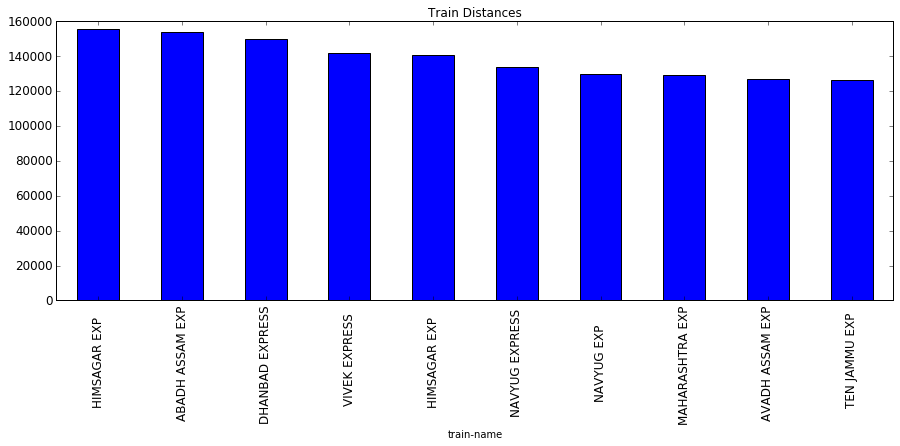

In [180]:
t_df = train_distances_df[['train-name', 'distance']].head(10)
s = pd.Series(t_df['distance'].tolist(), index=t_df['train-name'])

s.plot(
        kind='bar', 
        title ="Train Distances",
        figsize=(15,5),
        legend=False, 
        fontsize=12
    )

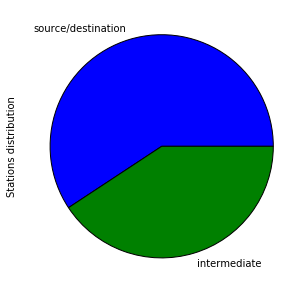

In [159]:
# Percentage of stations that are source/destination vs strictly intermediate
src_dest_station_codes = list(set(trains_df['source-station-code'].tolist() + trains_df['destination-station-code'].tolist()))
all_station_codes = trains_df['station-code'].tolist()
intermediate_station_codes = [i for i in all_station_codes if i not in src_dest_station_codes]

s = pd.Series(
    [len(all_station_codes), len(intermediate_station_codes)], 
    index=['source/destination', 'intermediate'],
    name="Stations distribution"
)
s.plot.pie(figsize=(5, 5))